In [24]:
from wikipedia_parsing import commuter as commuter_aircraft
from wikipedia_parsing import long_haul as long_haul_aircraft
from wikipedia_parsing import medium_haul as medium_haul_aircraft
from wikipedia_parsing import regional as regional_aircraft
from wikipedia_parsing import short_haul as short_haul_aircraft

import open_flight_exploratory
import pandas as pd

# Aviation and global carbon emissions
Our data was imported and cleaned in 2 helper function that take car of parsing the data and cleaning it. This reduces these long processes to a single import. This will allow use to focus on the analysis of our data in this notebook without being distracted with the fetching and cleaning of the data. These imports only take a handfull of seconds and should be functional even offline. If the *wiki_page.data.zx* is missing the imports will attempt to fetch the live version of the site.

# Carbon emission by class of plane

To start our analysis of what role does the aviation industry play in the global carbon emissions let's look at what type of jet's tends to polute the most. The aircraft data parsed from the wikipedia pages will be used to analyse that type of jets tend to pollute the most.

Note that wikipedia only gave us the fuel burn in kg/km, and L/100km per seat. To get how much one passenger pollutes we need to convert the liters of fuel (jet A-1 keroseen) to: $$\frac{\textit{kg of CO}_2}{100 \text{ km}}$$

According to https://authors.library.caltech.edu/25832/1/galcit_fm99-4.pdf jet fuel is mostly composed of Nonae $C_9H_{20}$. We will assume for the sake of simplicity that jet fuel is composed of a 100% Nonane. We will also make the assumption that aircraft fuel cumbustion is hapening under conditions where the fuel will undergo total combustion. Luckily we remember of chemistry course from high school.

$$C_9H_{20} + 14 O_2 \rightarrow 9CO_2 + 10 H_2O $$


| Element | Molar mass (g) |
|:-------:|:----------:|
|    C    |   12.011   |
|    H    |    1.008   |
|    O    |   15.999   |

Using the mass of each element from the table above we can calculate the molar mass of $C_9H_{20}$ and $CO_2$.

|   Molecule  | Molar mass (g) |
|:-----------:|:----------:|
| $C_9H_{20}$ |   128.259  |
|    $CO_2$   |    43.99   |

From the stoichiometric equation of the complete combustion of one mole of $C_9H_{20}$ we know that nine moles of $CO_2$ will be produced. 

One mole of Nonane will produce:
$$128.259 \, g \,C_9H_{20}= 9* 43.99 \, g \, CO_2$$
$$128.259 \, g \,C_9H_{20}=395.91 \, g \, CO_2$$
$$1 \, g \,C_9H_{20}=3.087 \, g \, CO_2$$

According to wikipedia the density of $C_9H_{20}$ is $0.718 \frac{\text{g}}{\text{ml}}$

In [25]:
"""aircraft data from wiki with labels"""
aircraft_data = [(commuter_aircraft, "commuter_aircraft"),
                 (regional_aircraft, "regional_aircraft"),
                 (short_haul_aircraft, "short_haul_aircraft"),
                 (medium_haul_aircraft, "medium_haul_aircraft"),
                 (long_haul_aircraft, "long_haul_aircraft")]

In [26]:
DENSITY_OF_NONANE = 0.718
CO2_PER_G_OF_NONANE = 3.087
CO2_RATIO = 3.086

def add_co2_per_seat(data: pd.DataFrame) -> pd.DataFrame:
    data['CO2 per seat kg/100km'] = data['Fuel per seat L/100km'].apply(lambda x: x * DENSITY_OF_NONANE * CO2_PER_G_OF_NONANE)
    return

def add_co2_per_km(data: pd.DataFrame) -> pd.DataFrame:
    data['CO2 kg/km'] = data["Fuel burn kg/km"].apply(lambda x: x * CO2_RATIO)
    return

In [27]:
"""Adding CO2 per seat using math and chemistry described above and label on what type of plane category it is in"""
for a in aircraft_data:
    add_co2_per_seat(a[0])
    add_co2_per_km(a[0])
    a[0]["Aircraft type"] = a[1]

In [28]:
for data, name in aircraft_data:
    print(name)
    print(data.mean())
    print()

commuter_aircraft
Seats                      54.944444
First flight             1995.222222
Fuel burn kg/km             2.013333
Fuel per seat L/100km       4.683333
Sector km                 560.000000
CO2 per seat kg/100km      10.380449
CO2 kg/km                   6.213147
dtype: float64

regional_aircraft
Seats                     110.976190
First flight             2004.833333
Fuel burn kg/km             2.717619
Fuel per seat L/100km       3.351667
Sector km                1070.166667
CO2 per seat kg/100km       7.428855
CO2 kg/km                   8.386572
dtype: float64

short_haul_aircraft
Seats                     152.920000
First flight             2002.360000
Fuel burn kg/km             3.108000
Fuel per seat L/100km       2.687200
Sector km                1900.000000
CO2 per seat kg/100km       5.956087
CO2 kg/km                   9.591288
dtype: float64

medium_haul_aircraft
Seats                     254.000000
First flight             1998.592593
Fuel burn kg/km         

In [29]:
all_aircraft = pd.concat([commuter_aircraft, regional_aircraft, short_haul_aircraft, medium_haul_aircraft, long_haul_aircraft])

In [30]:
all_aircraft.mean()

Seats                     176.676692
First flight             2002.105263
Fuel burn kg/km             4.133083
Fuel per seat L/100km       3.221429
Sector km                3613.248120
CO2 per seat kg/100km       7.140187
CO2 kg/km                  12.754693
dtype: float64

Apparently short haul aicraft pollute a litle bit less. Our hipothesis is that short haul flights have less material to carry arround. On short haul flights a few bathrooms on board might be sufficient. On long haul flights we are dealing to aircrafts that have 2 aisles, more bathrooms, usually a 3 class configuration. Depending on the destination long haul aircrafts are equiped with life rafts, and other emergency equipement that is not required to be carried on board short haul flights. People travelling long distances also tend to pack more, making there lugage and the aircraft heavier. Long haul aircrafts need to carry more fuel to longer distance flights.

In [31]:
all_aircraft.head(1)

,Model,Seats,First flight,Fuel burn kg/km,Fuel per seat L/100km,Sector km,CO2 per seat kg/100km,CO2 kg/km,Aircraft type
0,Antonov An-148 (241 nmi),89,2004,4.23,5.95,560.0,13.187973,13.05378,commuter_aircraft


In [32]:
import seaborn as sns
from matplotlib import pyplot as plt

Text(0.5, 1.05, 'CO2 per seat emissions by first flight year')

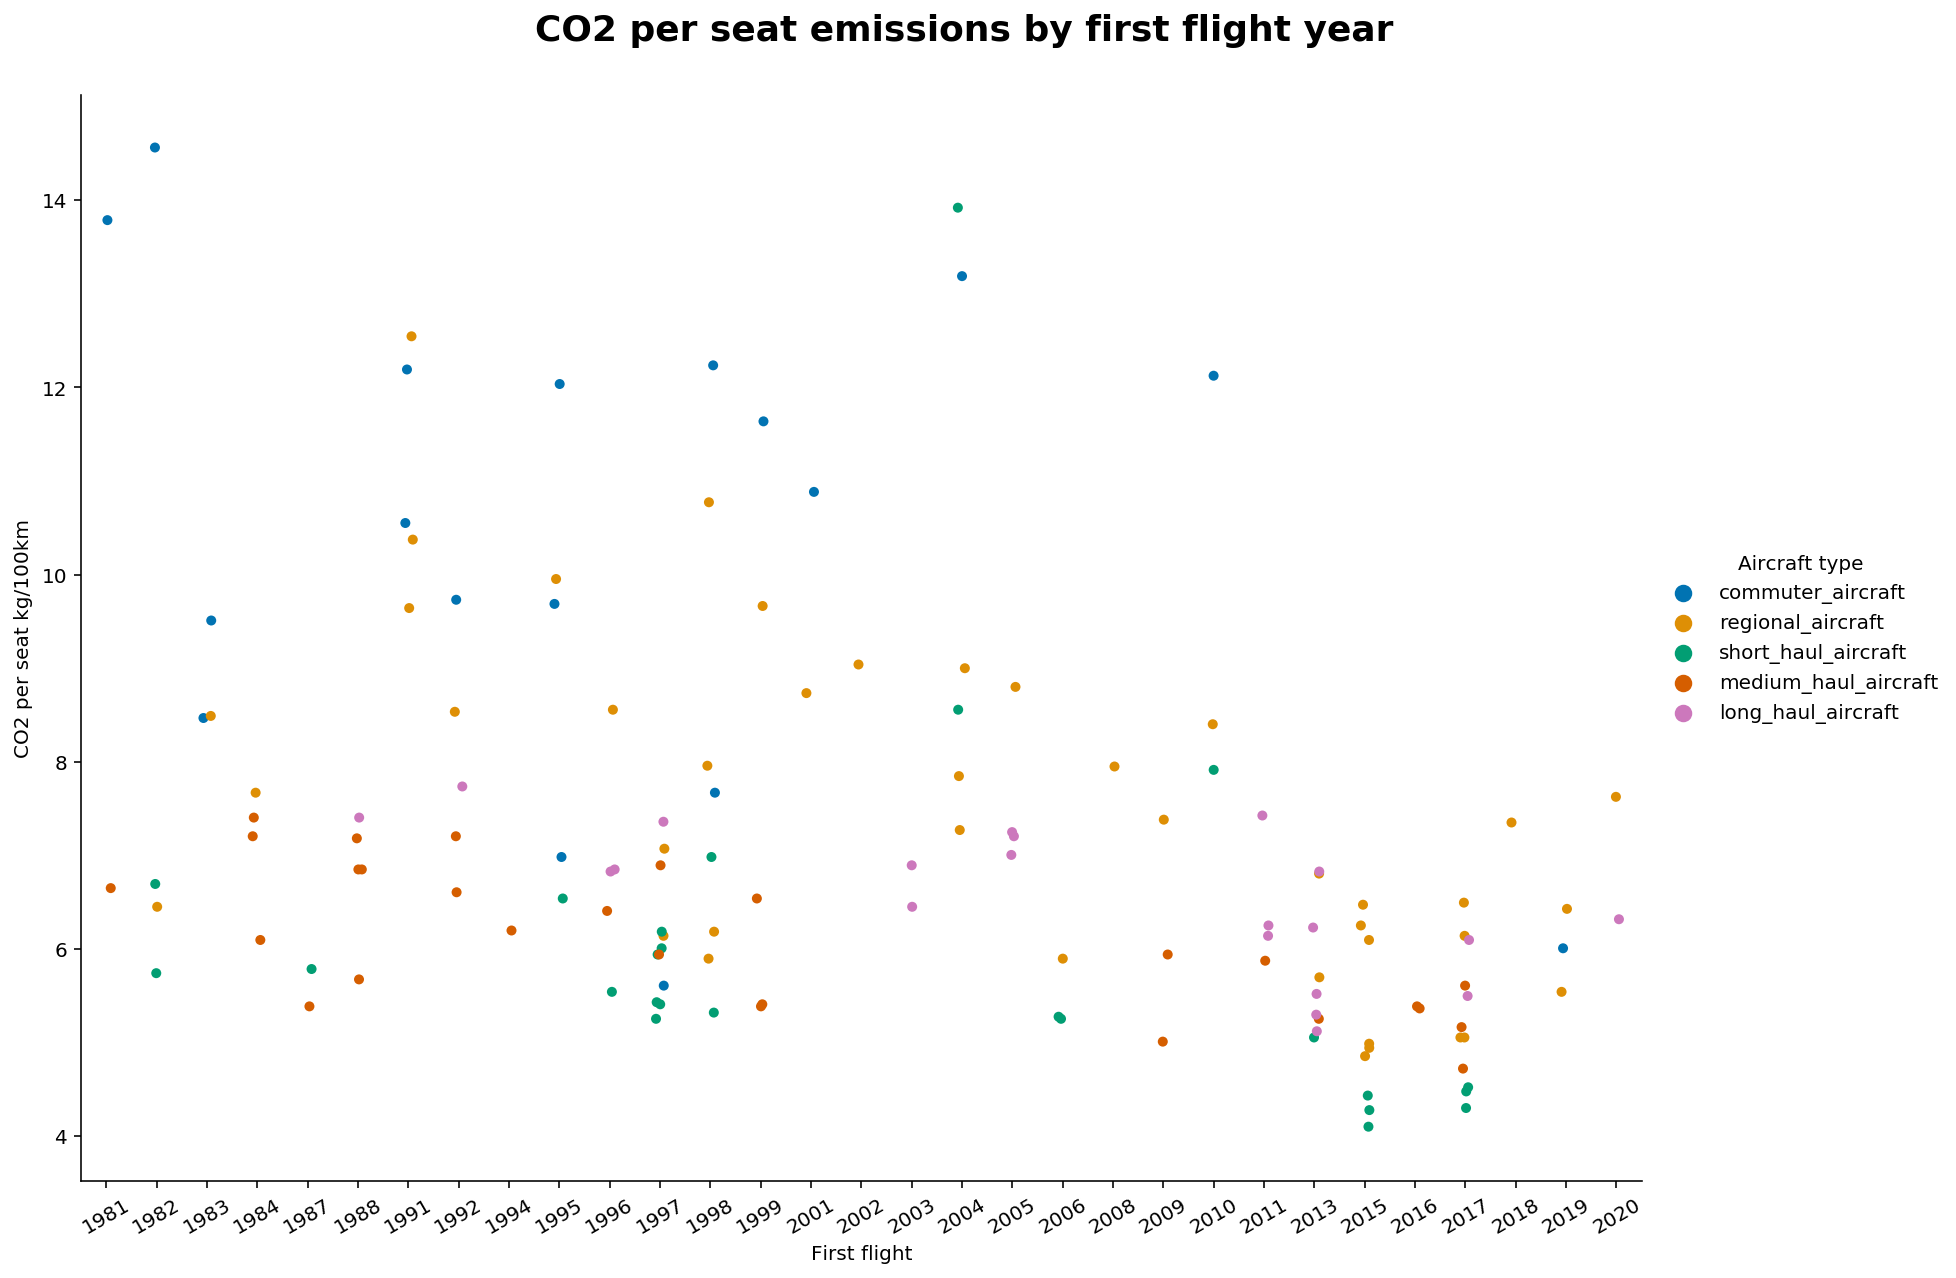

In [33]:
%config InlineBackend.figure_format ='retina'

#fig, ax = pyplot.subplots()
# the size of A4 paper
#fig.set_size_inches(17.7, 8.27)
g = sns.catplot(height=8.27, aspect=11.7/8.27, x="First flight", y="CO2 per seat kg/100km", data=all_aircraft, hue='Aircraft type', palette="colorblind")
g.set_xticklabels(rotation=30)
g.fig.suptitle('CO2 per seat emissions by first flight year' ,position=(0.5,1.05), fontweight='bold', size=18)

Ok this is reasuring. Planes are becomming more fuel efficient. Let's look at the trends.

In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np


In [35]:
def linear_regression_of_co2_per_seat(data: pd.DataFrame):
    X = data["First flight"].apply(lambda x: int(x))
    y = data["CO2 per seat kg/100km"]

    X = X.values
    y = y.values
    X = X.reshape((len(X),1))
    y = y.reshape((len(y),1))

    lr = LinearRegression().fit(X,y)
    print("slope of regression : " + str(lr.coef_[0][0]))

    X_test = np.arange(1980,2021).reshape((41,1))
    plt.scatter(X, y, color = "red")
    plt.plot(X_test, lr.predict(X_test), color = "green")
    plt.title("Aircraft CO2 per seat by different type of aircraft")
    plt.xlabel("First flight")
    plt.ylabel("CO2 per seat kg/100km")
    plt.show()

slope of regression : -0.07913092776942787


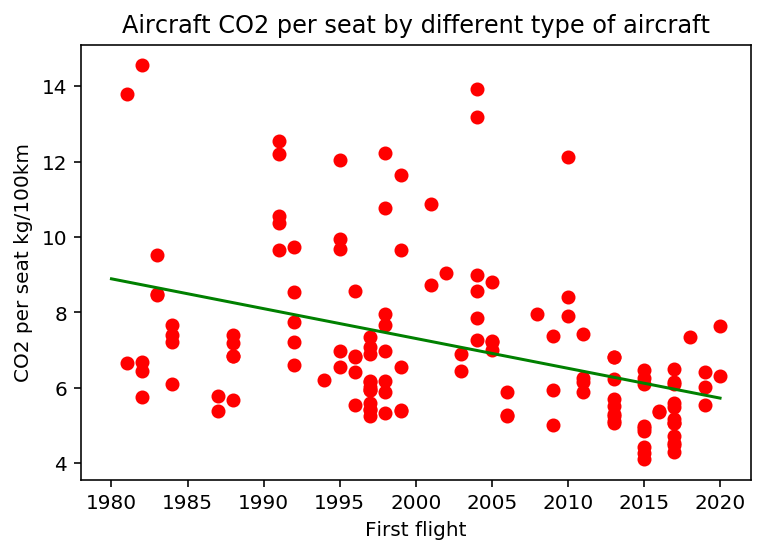

In [36]:
linear_regression_of_co2_per_seat(all_aircraft)

This is impressive. With the data that we collected it appears that the $CO_2$ emmisions have been decreasing of 7.9% each year. This is great progress.

commuter_aircraft
slope of regression : -0.08017627449669856


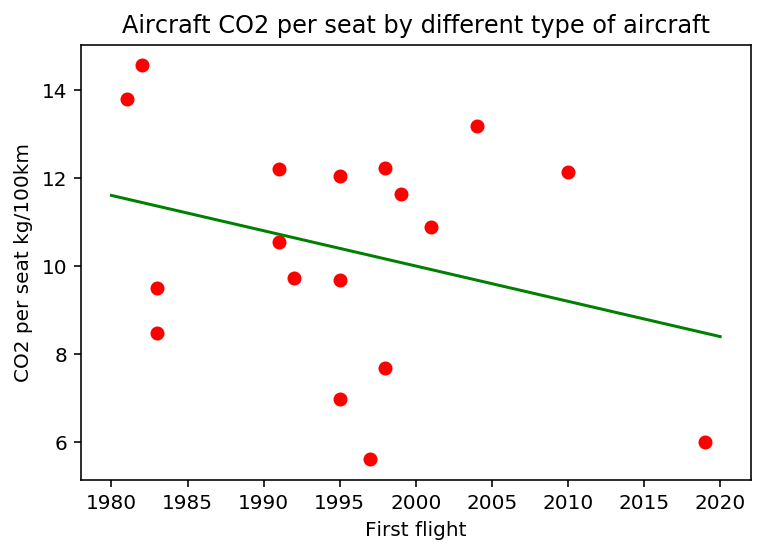

regional_aircraft
slope of regression : -0.09454463782309695


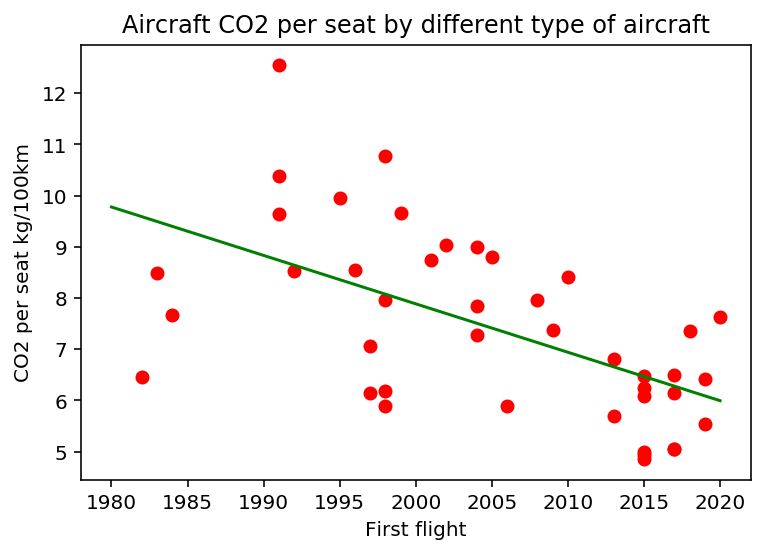

short_haul_aircraft
slope of regression : -0.04318612686470605


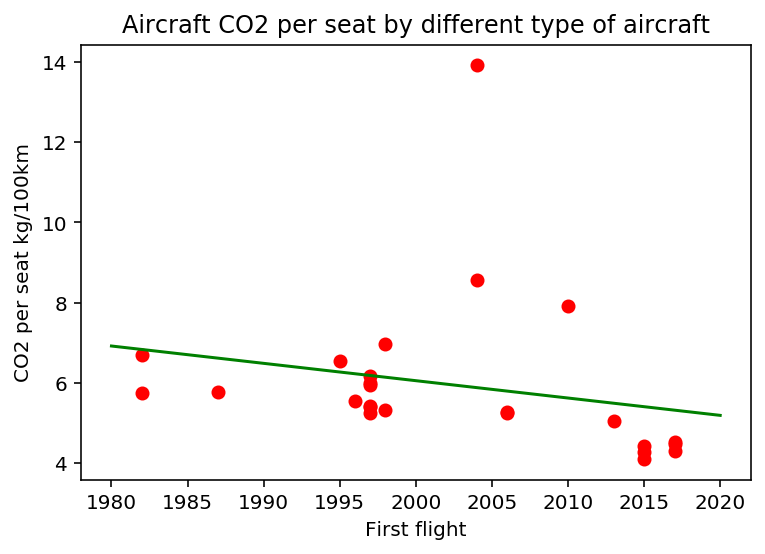

medium_haul_aircraft
slope of regression : -0.046066174618046865


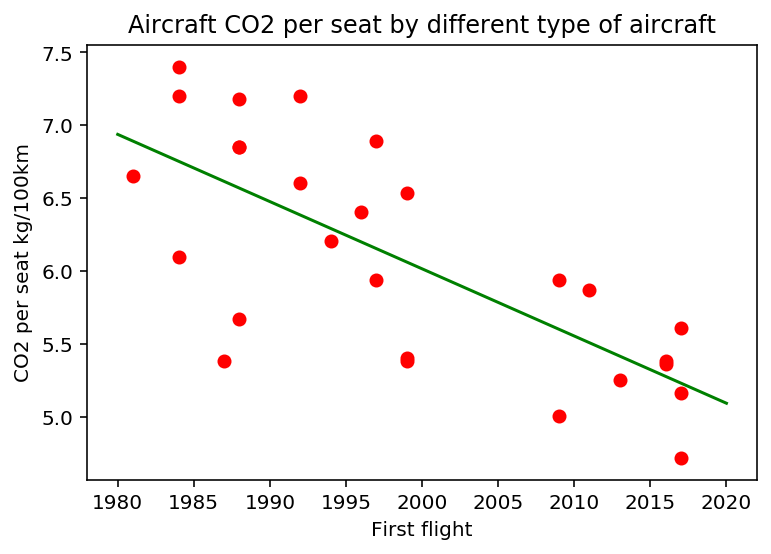

long_haul_aircraft
slope of regression : -0.05929134066881299


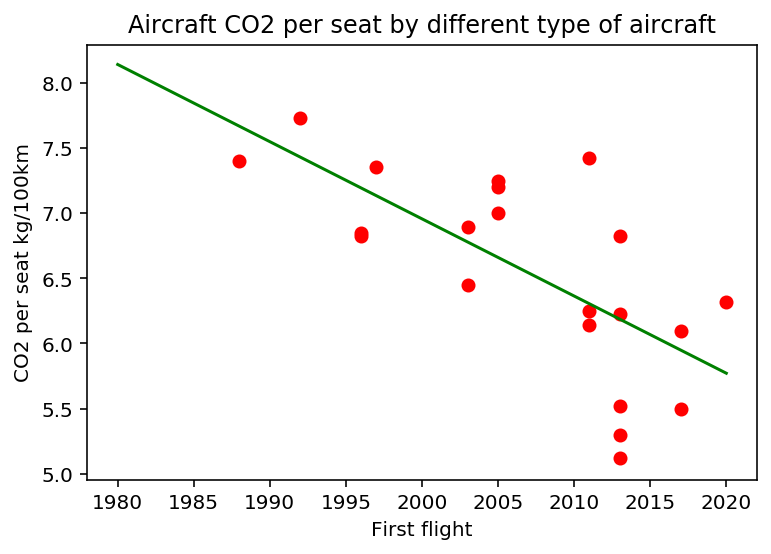

In [37]:
for a in aircraft_data:
    print(a[1])
    linear_regression_of_co2_per_seat(a[0])

# CO2 kg/km emission per sector size 

First, let's plot the mean CO2 emissions (kg/km) according to the sector size

In [38]:
co2_by_sector_size = all_aircraft.groupby("Sector km").mean().reset_index()[["Sector km", "CO2 kg/km"]]

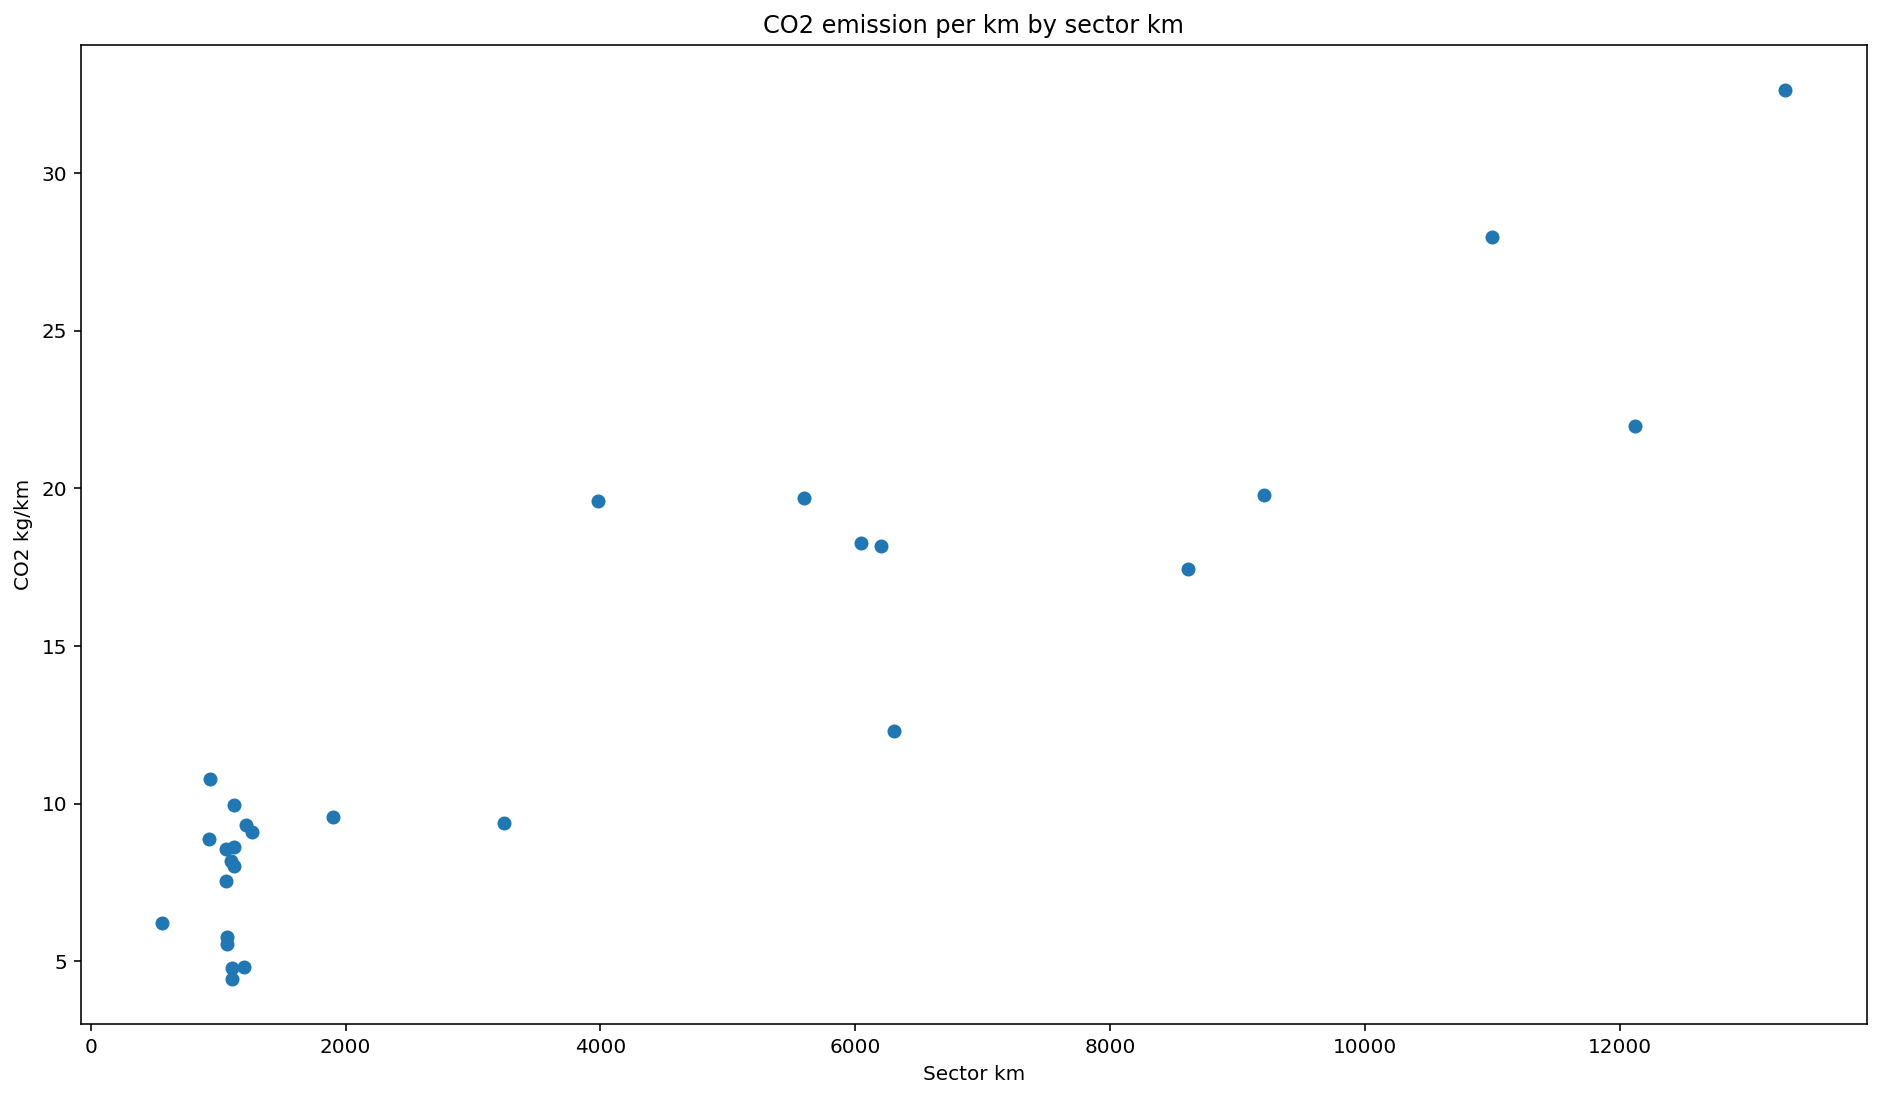

In [39]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(co2_by_sector_size["Sector km"], co2_by_sector_size["CO2 kg/km"])
plt.xlabel("Sector km")
plt.ylabel("CO2 kg/km")
plt.title("CO2 emission per km by sector km")
plt.show()

It seems that the bigger the sector size is, the bigger the CO2 emissions by km are. But let's see:

In [40]:
seats_by_sector = all_aircraft.groupby("Sector km").mean().reset_index()[["Sector km", "Seats"]]

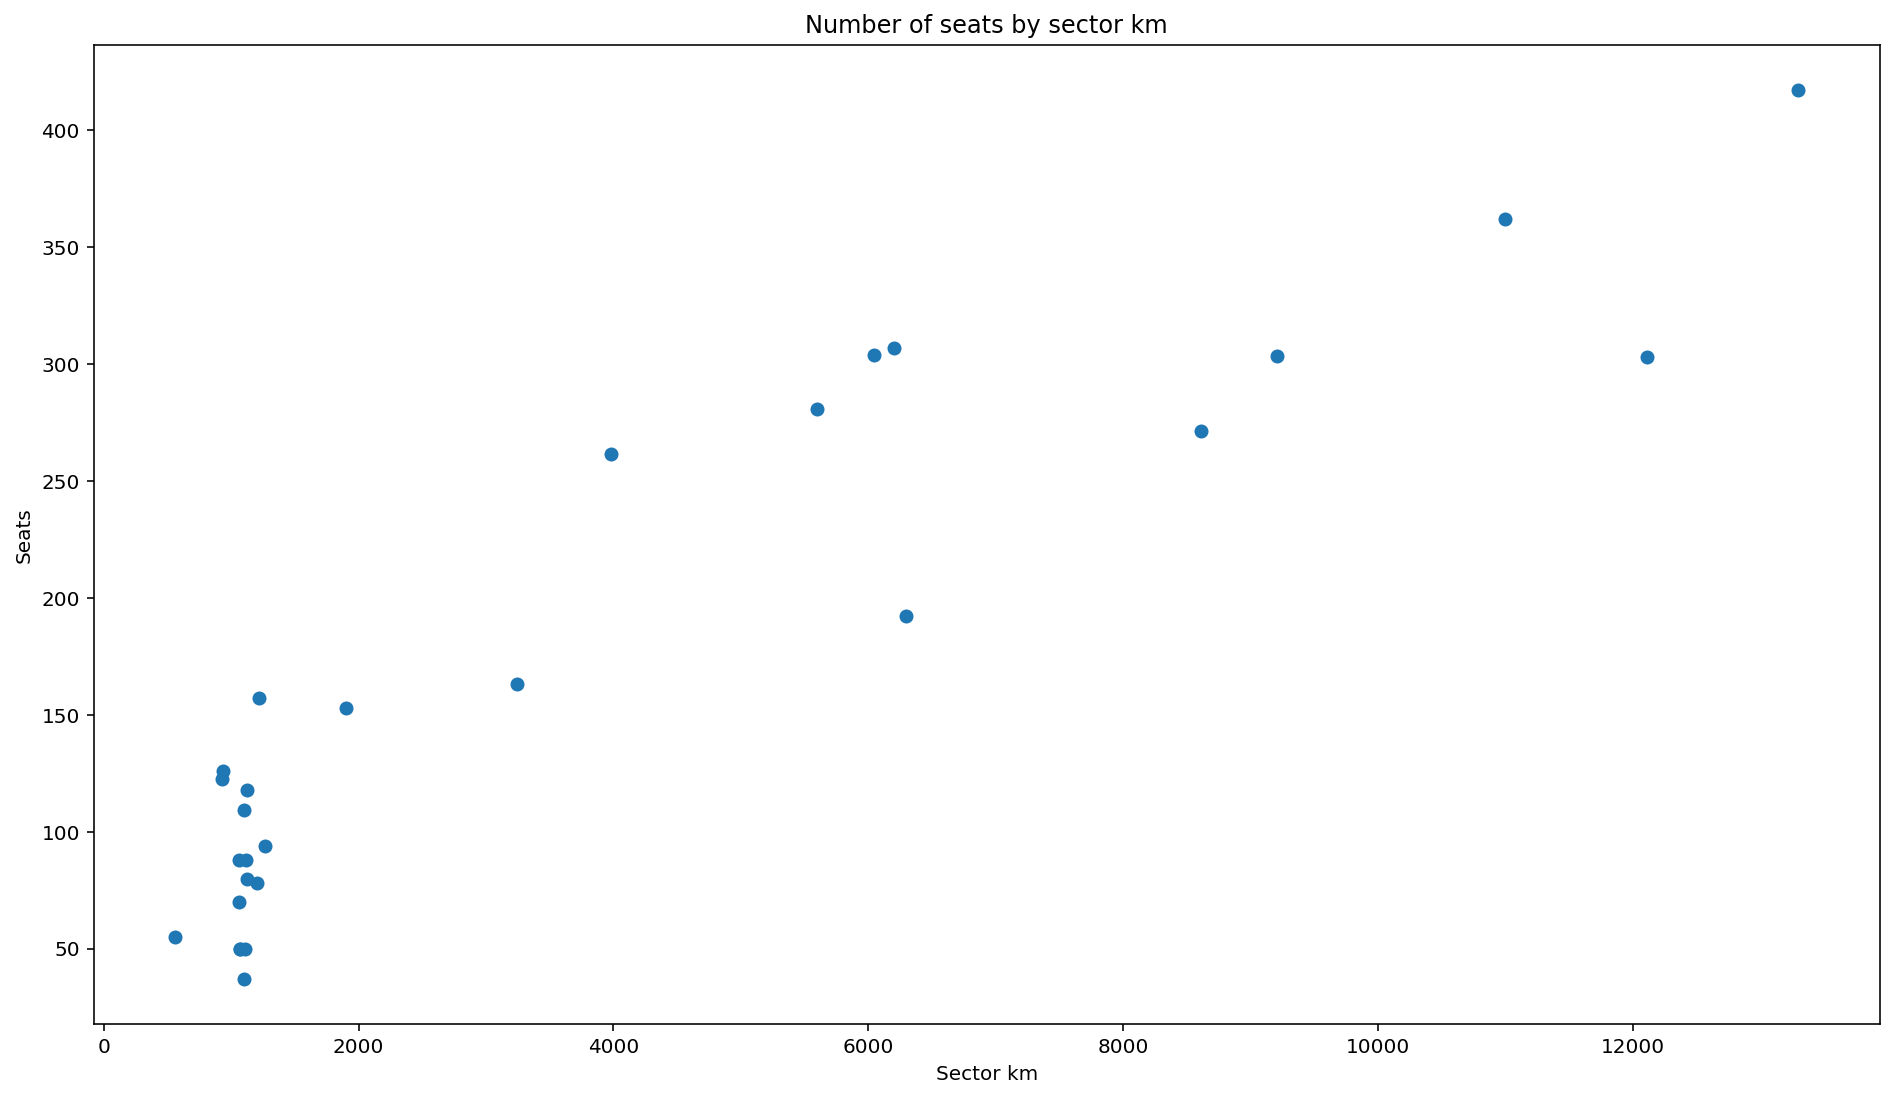

In [41]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(seats_by_sector["Sector km"], seats_by_sector["Seats"])
plt.title("Number of seats by sector km")
plt.xlabel("Sector km")
plt.ylabel("Seats")
plt.show()

Indeed, the bigger the distance is, the more seats the plane has. It would then be more interesting to plot the CO2 emissions relatively to the number of seats. 

In [42]:
co2_by_seat = all_aircraft.groupby("Sector km").mean().reset_index()[["Sector km", "CO2 per seat kg/100km"]]

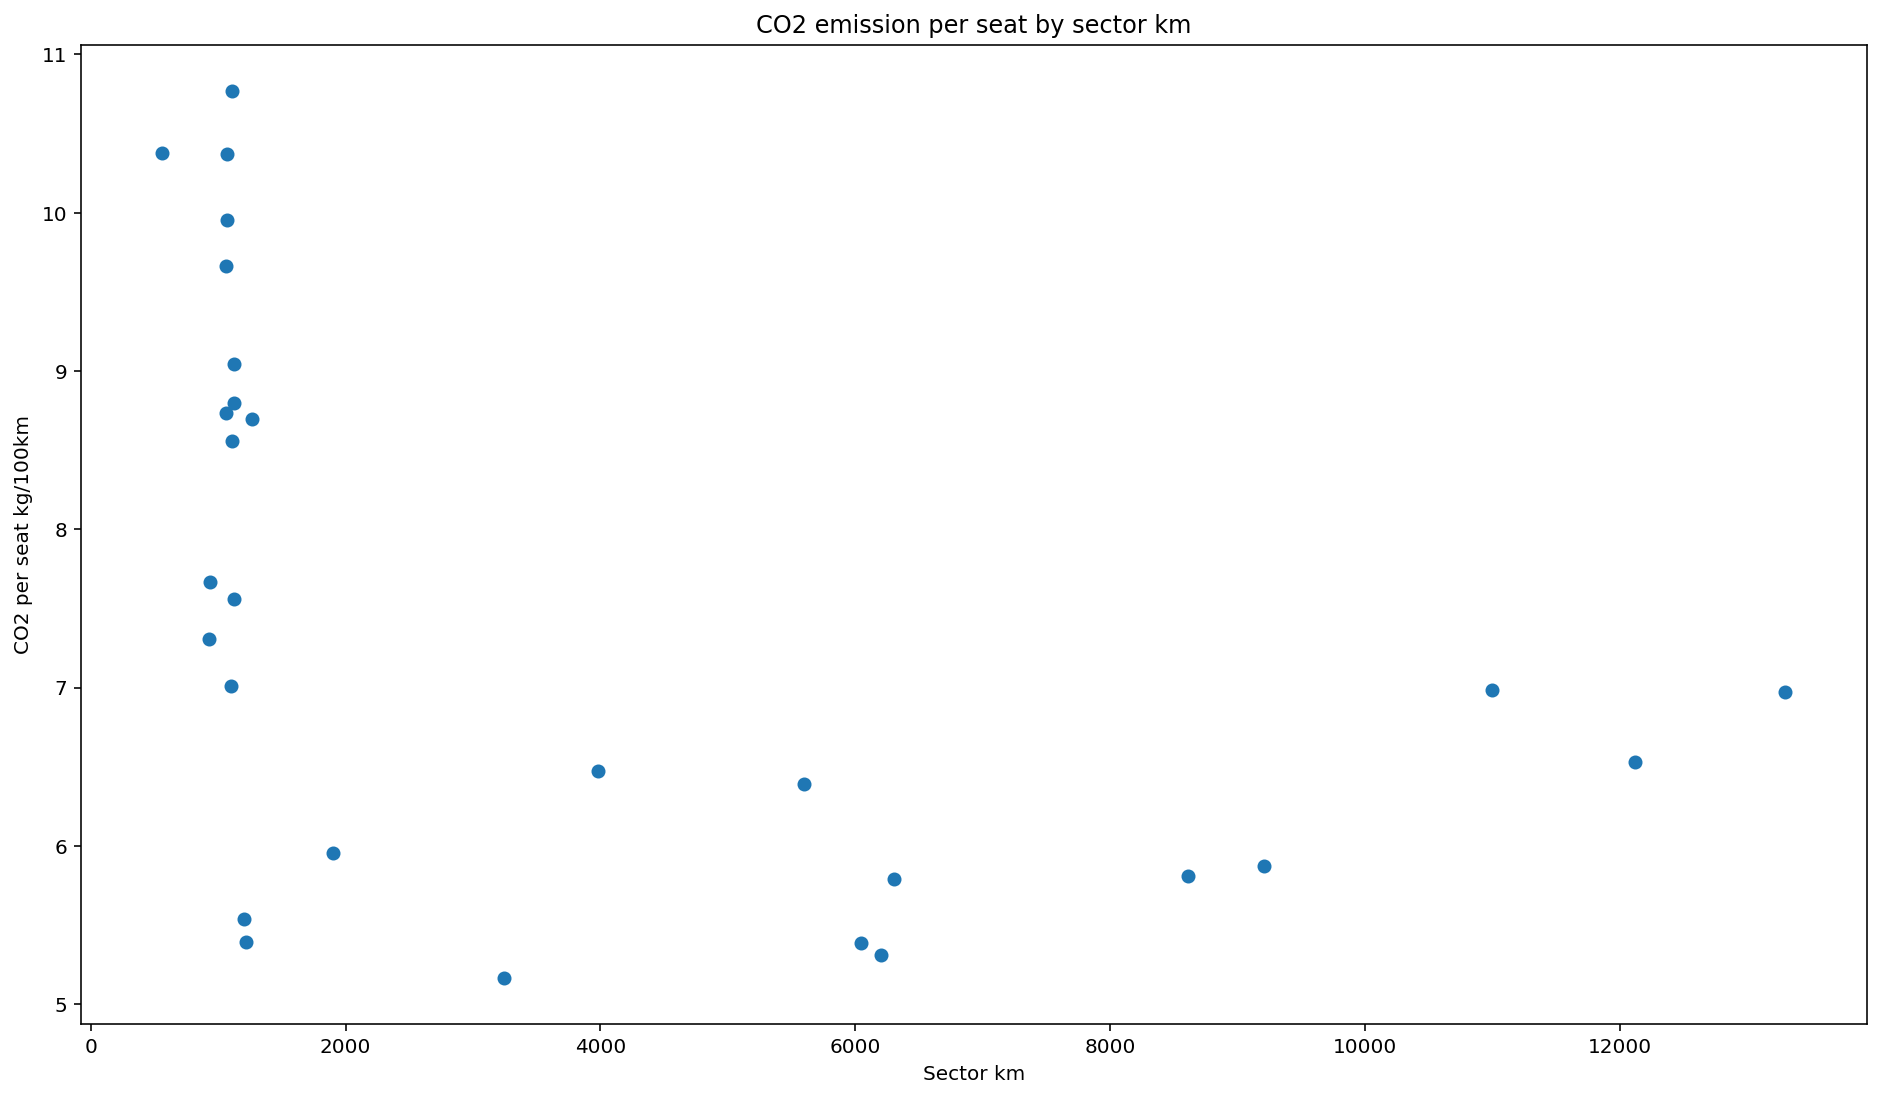

In [43]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(co2_by_seat["Sector km"], co2_by_seat["CO2 per seat kg/100km"])
plt.title("CO2 emission per seat by sector km")
plt.xlabel("Sector km")
plt.ylabel("CO2 per seat kg/100km")
plt.show()

In [44]:
regional_co2_seat = regional_aircraft.groupby("Sector km").mean().reset_index()

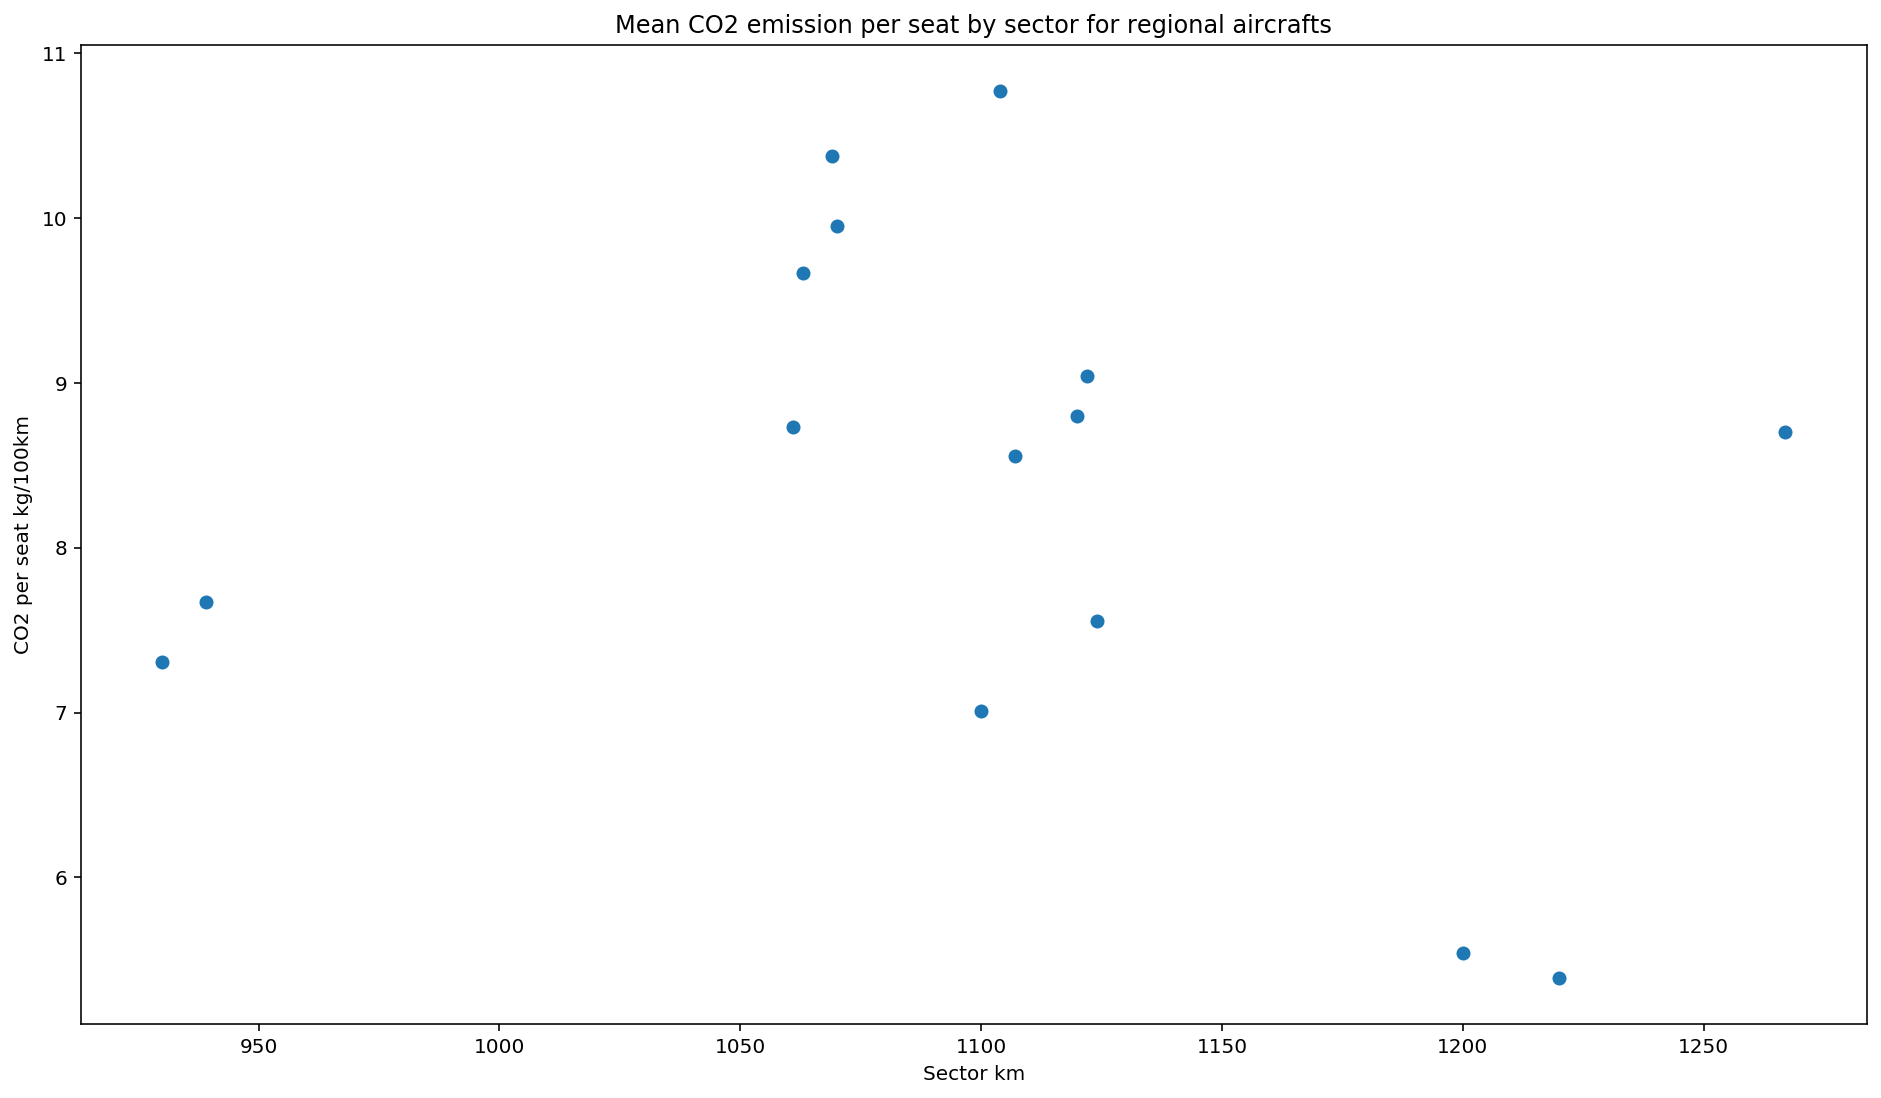

In [45]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(regional_co2_seat["Sector km"], regional_co2_seat["CO2 per seat kg/100km"])
plt.title("Mean CO2 emission per seat by sector for regional aircrafts")
plt.xlabel("Sector km")
plt.ylabel("CO2 per seat kg/100km")
plt.show()

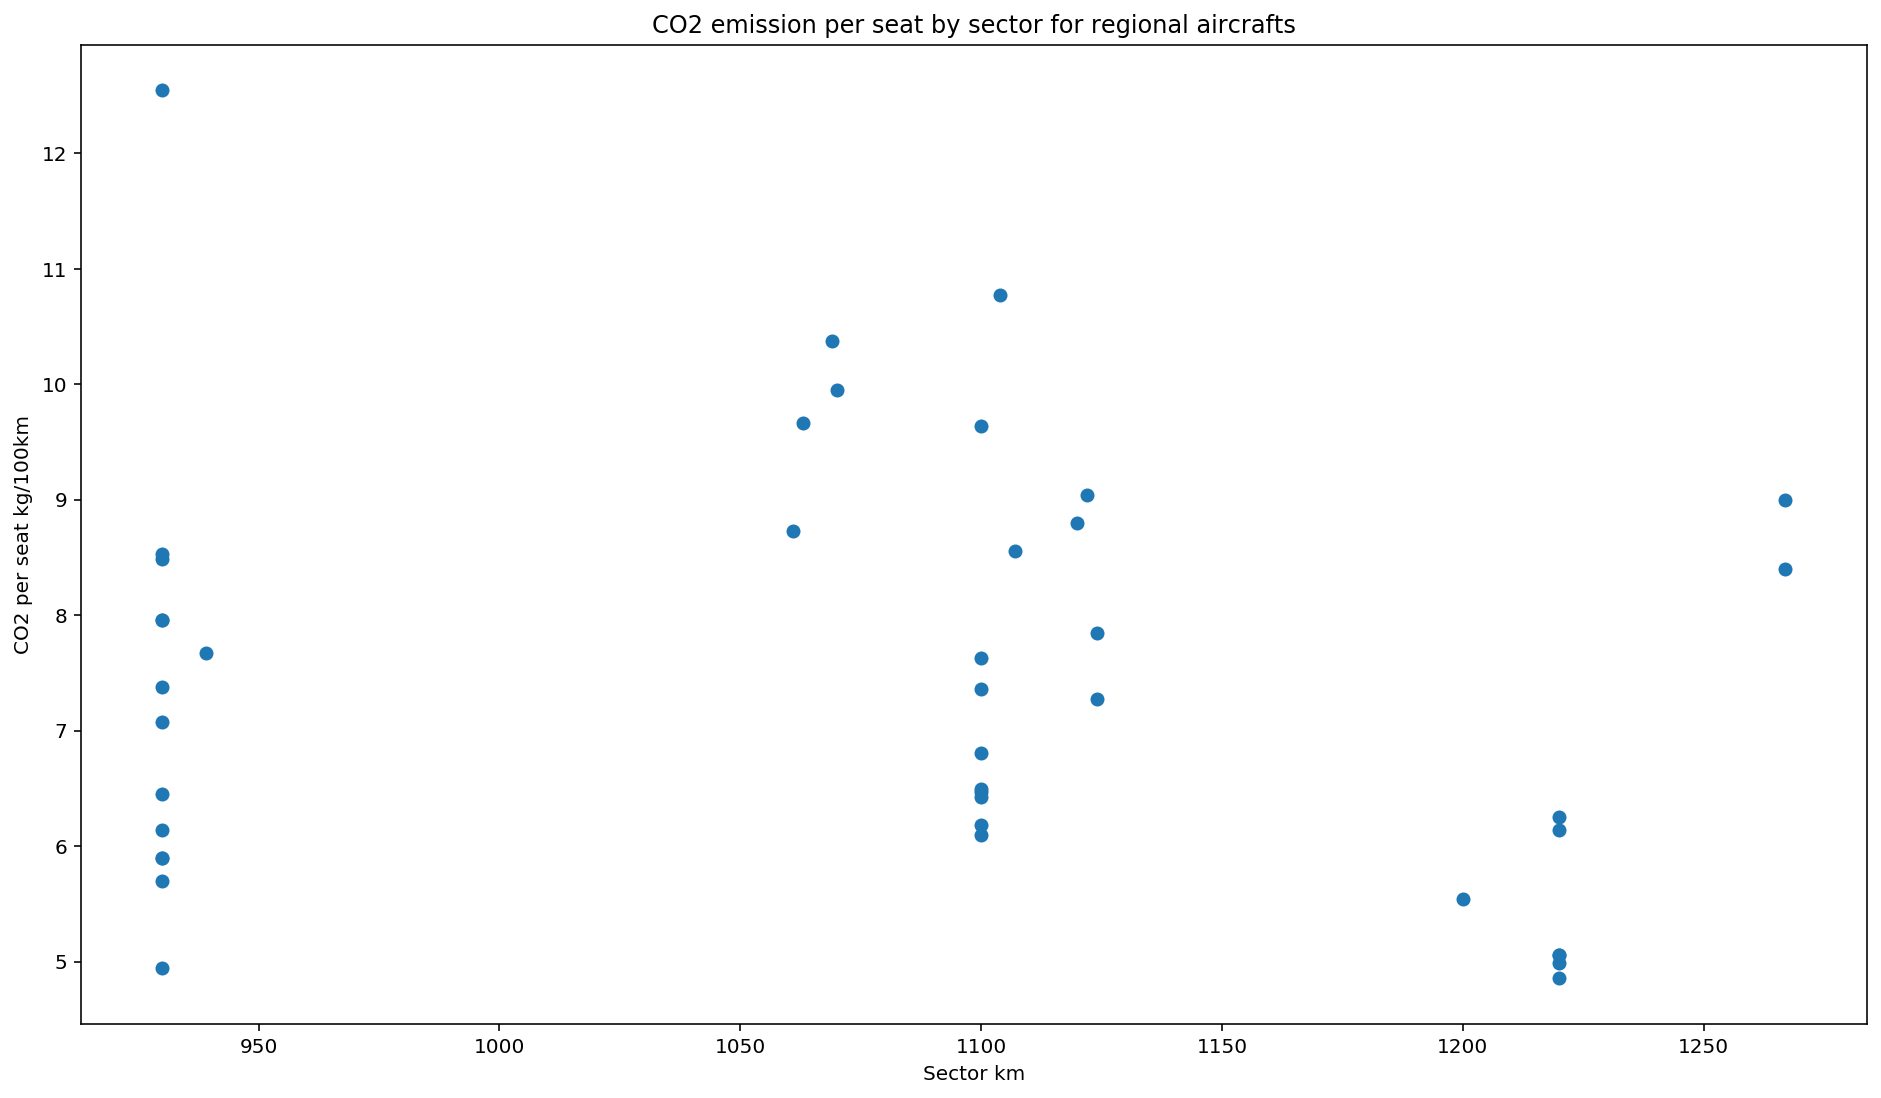

In [46]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(regional_aircraft["Sector km"], regional_aircraft["CO2 per seat kg/100km"])
plt.title("CO2 emission per seat by sector for regional aircrafts")
plt.xlabel("Sector km")
plt.ylabel("CO2 per seat kg/100km")
plt.show()

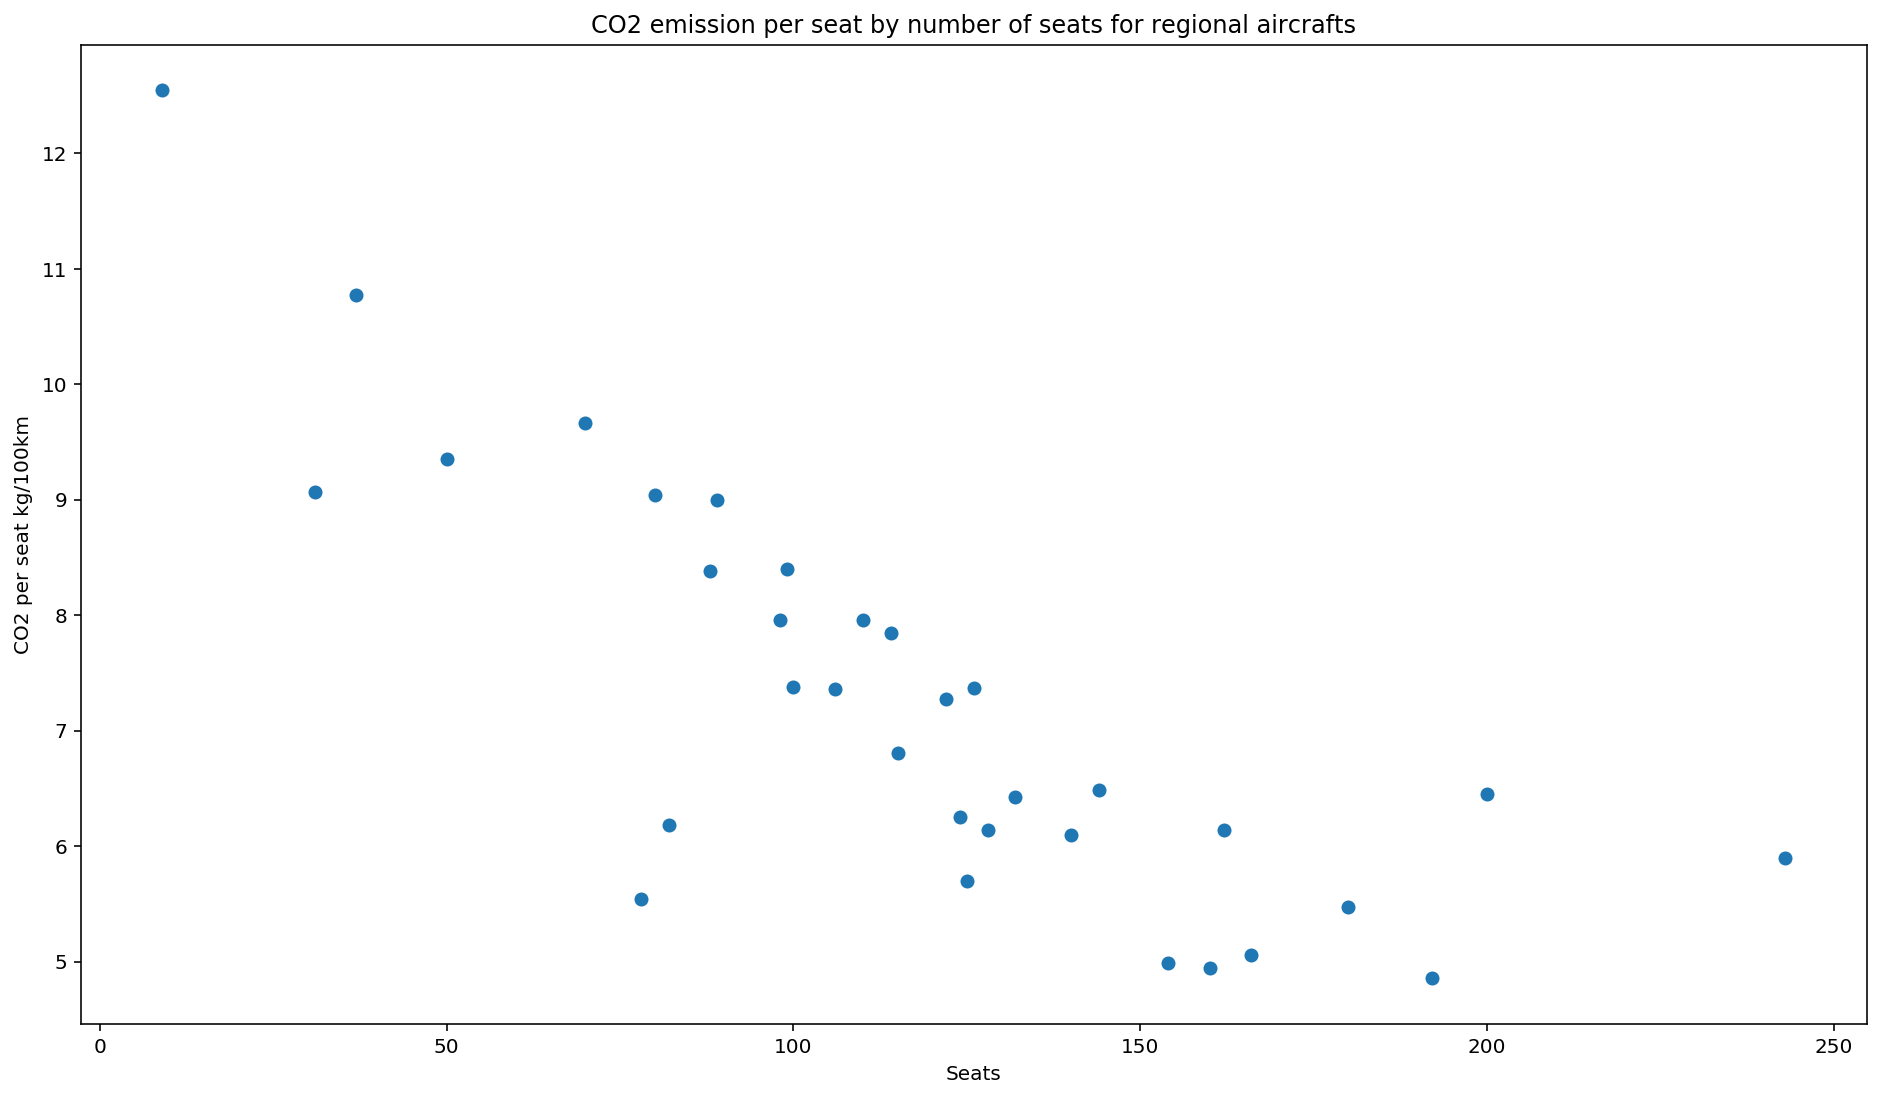

In [47]:
regional_seats = regional_aircraft.groupby("Seats").mean().reset_index()
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(regional_seats["Seats"], regional_seats["CO2 per seat kg/100km"])
plt.title("CO2 emission per seat by number of seats for regional aircrafts")
plt.xlabel("Seats")
plt.ylabel("CO2 per seat kg/100km")
plt.show()

In [52]:
aircraft_sorted_by_seats

,Model,Seats,First flight,Fuel burn kg/km,Fuel per seat L/100km,Sector km,CO2 per seat kg/100km,CO2 kg/km,Aircraft type
24,Quest Kodiak,9,2004,0.71,6.28,1900.0,13.919406,2.19106,short_haul_aircraft
37,Pilatus PC-12,9,1991,0.41,5.66,930.0,12.545198,1.26526,regional_aircraft
4,Beechcraft 1900D (226 nm),19,1982,1.00,6.57,560.0,14.562182,3.08600,commuter_aircraft
10,Dornier 228,19,1981,0.94,6.22,560.0,13.786419,2.90084,commuter_aircraft
12,Embraer Brasilia,30,1983,0.92,3.82,560.0,8.466900,2.83912,commuter_aircraft
...,...,...,...,...,...,...,...,...,...
8,Boeing 747-400,416,1988,10.77,3.24,3984.0,7.181350,33.23622,medium_haul_aircraft
9,Boeing 747-8,467,2011,10.54,2.82,11000.0,6.250434,32.52644,long_haul_aircraft
9,Boeing 747-8,467,2011,9.90,2.65,5600.0,5.873635,30.55140,medium_haul_aircraft
6,Airbus A380,525,2005,13.78,3.27,13300.0,7.247844,42.52508,long_haul_aircraft


In [53]:
import plotly.express as px
fig = px.scatter(
    data_frame=aircraft_sorted_by_seats,
    x="Seats",
    y='CO2 per seat kg/100km',
    color='Aircraft type', hover_name="Model")
fig.show()

In [145]:
aircraft_sorted_by_seats

,Model,Seats,First flight,Fuel burn kg/km,Fuel per seat L/100km,Sector km,CO2 per seat kg/100km,CO2 kg/km,Aircraft type
24,Quest Kodiak,9,2004,0.71,6.28,1900.0,13.919406,2.19106,short_haul_aircraft
37,Pilatus PC-12,9,1991,0.41,5.66,930.0,12.545198,1.26526,regional_aircraft
4,Beechcraft 1900D (226 nm),19,1982,1.00,6.57,560.0,14.562182,3.08600,commuter_aircraft
10,Dornier 228,19,1981,0.94,6.22,560.0,13.786419,2.90084,commuter_aircraft
12,Embraer Brasilia,30,1983,0.92,3.82,560.0,8.466900,2.83912,commuter_aircraft
...,...,...,...,...,...,...,...,...,...
8,Boeing 747-400,416,1988,10.77,3.24,3984.0,7.181350,33.23622,medium_haul_aircraft
9,Boeing 747-8,467,2011,10.54,2.82,11000.0,6.250434,32.52644,long_haul_aircraft
9,Boeing 747-8,467,2011,9.90,2.65,5600.0,5.873635,30.55140,medium_haul_aircraft
6,Airbus A380,525,2005,13.78,3.27,13300.0,7.247844,42.52508,long_haul_aircraft


In [113]:
#Jeremy methods

def build_poly(x, degree):
    return np.vander(x,N=degree+1, increasing=True)

def least_squares(y, tx):
    """calculate the least squares solution."""
    w = np.linalg.solve(tx.T@tx, tx.T@y)
    loss = compute_loss(y,tx,w)
    return loss, w

def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx@w
    return 1/(2*y.shape[0])*e.T@e

def compute_mse(y, tx, w):
    e = y - tx@w
    return 1/(2*y.shape[0])*e.T@e

def plot_fitted_curve(y, x, weights, degree, ax):
    """plot the fitted curve."""
    ax.scatter(x, y, color='b', s=12, facecolors='none', edgecolors='r')
    xvals = np.arange(min(x) - 0.1, max(x) + 0.1, 0.1)
    tx = build_poly(xvals, degree)
    f = tx.dot(weights)
    ax.plot(xvals, f)
    ax.set_xlabel("Seats")
    ax.set_ylabel("CO2 per seat kg/100km")
    ax.set_title("Polynomial degree " + str(degree))
    

<class 'numpy.ndarray'>
1.130245517595007


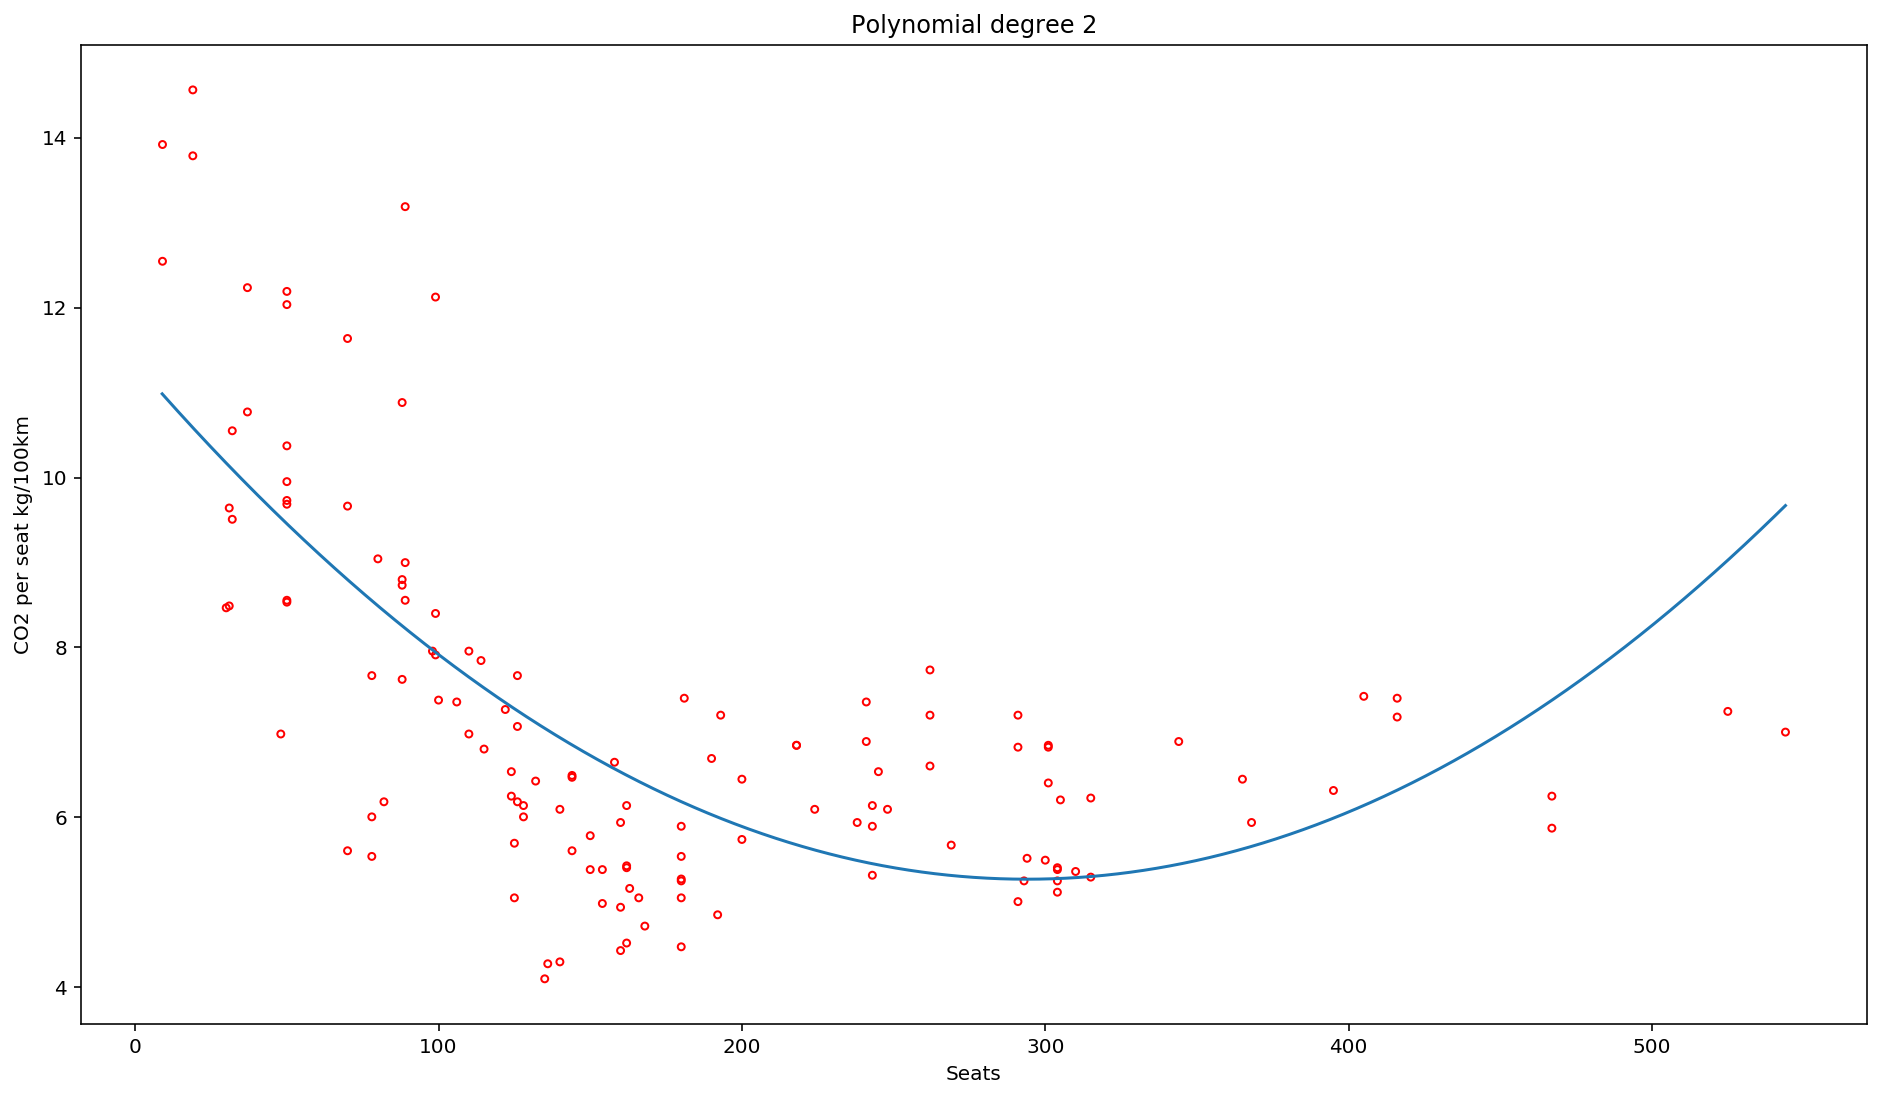

In [114]:
x = aircraft_sorted_by_seats["Seats"].values
degree = 2
y = aircraft_sorted_by_seats["CO2 per seat kg/100km"]

m = build_poly(x, degree)
print(type(m))
loss, weights = least_squares(y,m)
rmse = np.sqrt(2*compute_mse(y,m,weights))
print(loss)

# plot fit
fig, axs = plt.subplots(figsize=(16, 9))
plot_fitted_curve(y, x, weights, degree, axs)

In [105]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a*x**2 + b*x + c

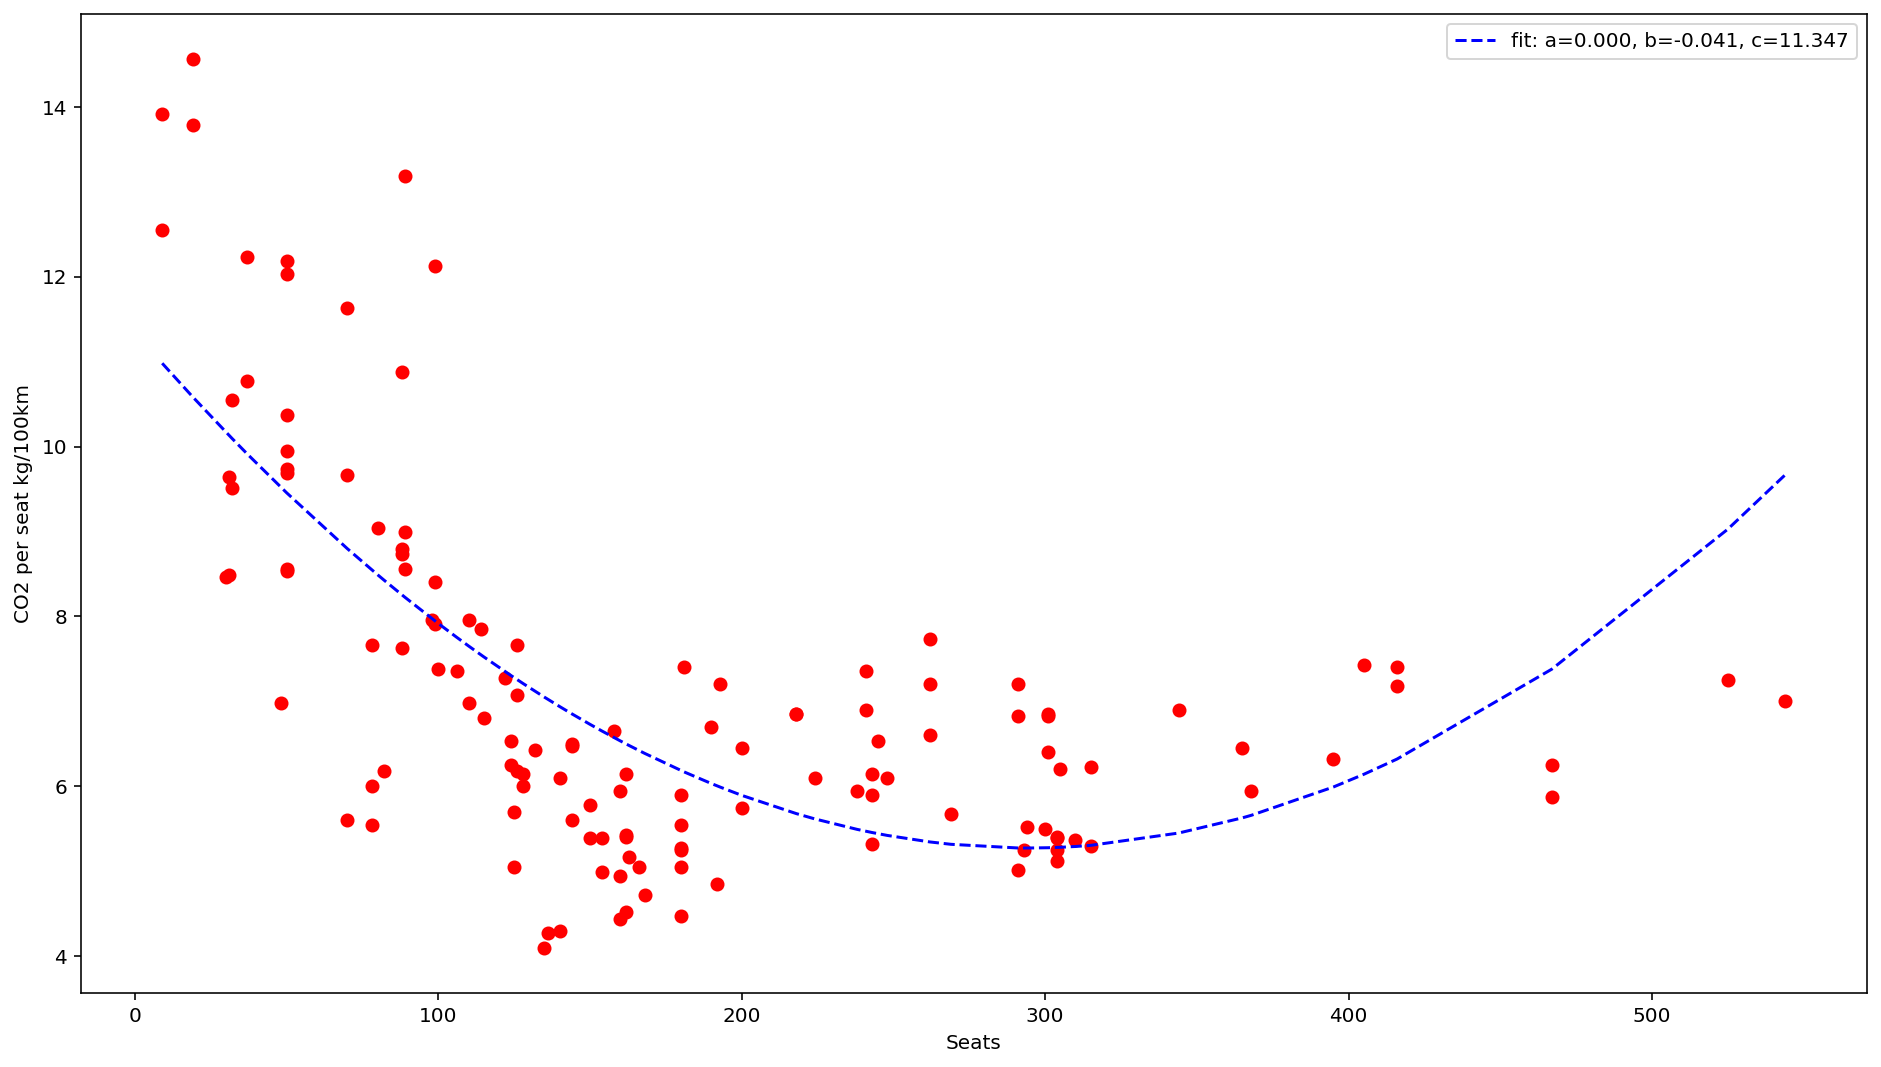

In [118]:
# Andrea's DH method
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(aircraft_sorted_by_seats['Seats'], aircraft_sorted_by_seats['CO2 per seat kg/100km'], color = 'red')

popt, pcov = curve_fit(func, aircraft_sorted_by_seats['Seats'], aircraft_sorted_by_seats['CO2 per seat kg/100km'])

plt.plot(aircraft_sorted_by_seats['Seats'], func(aircraft_sorted_by_seats['Seats'], *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), color = "blue")
plt.xlabel('Seats')
plt.ylabel('CO2 per seat kg/100km')
plt.legend()
plt.show()